In [5]:
!pip install sklearn
import numpy as np
import math
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Defaulting to user installation because normal site-packages is not writeable


In [6]:
class Perceptron:
    weights: np.array
    dimension: int
    confusion_matrix: np.array
    
    def __init__(self,dimension: int):
        self.weights = np.zeros(dimension)
        self.dimension = dimension
    
    def loss_function(self,true_label: int,predicted_label: int):
        return max(0,(-true_label * predicted_label))
        
    def train_model(self,features: pd.DataFrame, labels: pd.DataFrame, max_iterations: int):
        itt = 0;
        column_name = labels.columns.tolist()
        
        while (itt < max_iterations):
            learning_rate = 0.001
        
            for (index_x, row_x), (index_y, row_y) in zip(features.iterrows(),labels.iterrows()):
                true_label = row_y[column_name[0]]
                x_i = np.array(row_x)
                weighted_sum = np.dot(self.weights,x_i)
                
                classification = 1 if weighted_sum > 0.5 else -1
                
                loss = self.loss_function(true_label, classification)
                if loss != 0:
                    self.weights += true_label * x_i * learning_rate
                    
            itt += 1
                
    def classify_samples(self, features: pd.DataFrame, labels: pd.DataFrame):
        self.confusion_matrix = np.zeros((self.dimension, self.dimension))
        column_name = labels.columns.tolist()
        for (index_x, row_x), (index_y, row_y) in zip(features.iterrows(),labels.iterrows()):
            true_label = row_y[column_name[0]]
            x_i = np.array(row_x)
            weighted_sum = np.dot(self.weights,x_i)
                
            classification = 1 if weighted_sum > 0.5 else -1
            
            self.classify_inference(classification, true_label)
            
    def classify_inference(self, classification, true_class):
        if classification == true_class and classification == 1:
            self.confusion_matrix[0][0] += 1
            return
        if classification == true_class and classification == -1:
            self.confusion_matrix[1][1] += 1
            return
        if classification != true_class and classification == 1:
            self.confusion_matrix[1][0] += 1
            return
        if classification != true_class and classification == -1:
            self.confusion_matrix[0][1] += 1
            return
    
    def get_confusion_matrix(self):
        return self.confusion_matrix
    
    def split_dataset(self, dataset, proportion):
        train_data, test_data, _, _ = train_test_split(dataset,dataset,test_size=proportion,random_state=None)
        return train_data, test_data
            
            
            

In [7]:
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df['target'] = dataset.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df = df[['sepal length (cm)', 'sepal width (cm)','target']]
filtered_df = df[~(df.target == 1)]
filtered_df['target'] = filtered_df['target'].map({0:-1, 2:1})
filtered_df

/tmp/ipykernel_3534/4260052285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['target'] = filtered_df['target'].map({0:-1, 2:1})


,sepal length (cm),sepal width (cm),target
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [9]:
filtered_df.columns = [c.replace(' ', '_') for c in filtered_df]
filtered_df.columns = [c.lstrip() for c in filtered_df]
filtered_df.columns = [c.rstrip() for c in filtered_df]
filtered_df

,sepal_length_(cm),sepal_width_(cm),target
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,1
147,6.5,3.0,1
148,6.2,3.4,1


In [28]:
model = Perceptron(2)
train_data, test_data = model.split_dataset(filtered_df, 0.2)

x_labels = train_data.drop(columns='target')
y_label = train_data.drop(columns=['sepal_length_(cm)', 'sepal_width_(cm)'])

model.train_model(x_labels, y_label,20)

In [29]:
model.classify_samples(test_data.drop(columns='target'), test_data.drop(columns=['sepal_length_(cm)', 'sepal_width_(cm)']))

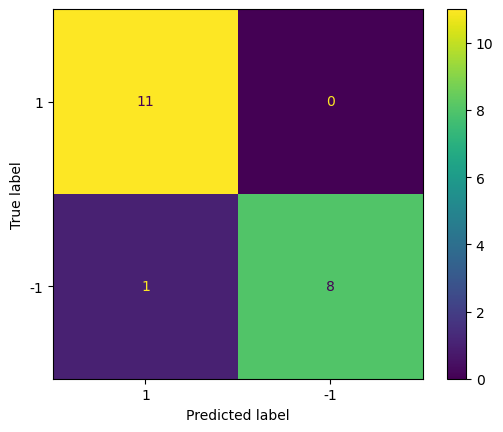

In [30]:
cm = model.get_confusion_matrix()
cm = ConfusionMatrixDisplay(cm,display_labels=[1,-1])

cm.plot()
plt.show()